In [1]:
from threeML import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

: 

: 

In [2]:
lle_catalog = FermiLLEBurstCatalog()

def generate_lle_lightcurve(name = "GRB141222298", time_in = -30, time_out = 30, dt=.1, returnfig = False):
    """
    Parameters: name, time_in, time_out, dt, 
    returnfig = True to return output as tuple with figure

    Returns a dataframe with binning and counts;
    figure optionally.
    """
    lle_catalog.query_sources(name)

    dload = download_LLE_trigger_data(name)

    ts_lle = TimeSeriesBuilder.from_lat_lle(
        "GRB141222298",
        lle_file=dload["lle"],
        ft2_file=dload["ft2"],
        rsp_file=dload['rsp']
    )

    ts_lle.create_time_bins(time_in, time_out, dt=dt)

    data = ts_lle.bins._create_pandas()
    data['Counts'] = ts_lle.total_counts_per_interval

    if returnfig is True:
        return data, ts_lle.view_lightcurve(time_in, time_out, dt=dt)
    else:
        return data

In [3]:
gbm_catalog = FermiGBMBurstCatalog()

def generate_gbm_lightcurve(name = "GRB141222298", time_in = -30, time_out = 30, dt=.1, gbm_detectors = None, returnfig = False):
    """
    Parameters: name, time_in, time_out, dt, 
    detectors = None for default mask; list for specific detectors
    returnfig = True to return output as tuple with figure

    Returns a dictionary with dataframes with binning and counts for each detector;
    figures optionally.
    """
    gbm_catalog.query_sources(name)

    grb_info = gbm_catalog.get_detector_information()[name]
    background_interval = grb_info["background"]["full"]

    if gbm_detectors is None:
        gbm_detectors = grb_info["detectors"]
    print(gbm_detectors)

    dload = download_GBM_trigger_data('bn%s'%name[3:], detectors=gbm_detectors)

    if returnfig is True:
        figures = []

    time_series = {}
    for det in gbm_detectors:

        # Calculate background
        ts_cspec = TimeSeriesBuilder.from_gbm_cspec_or_ctime(
            det, cspec_or_ctime_file=dload[det]["cspec"], rsp_file=dload[det]["rsp"]
        )
        ts_cspec.set_background_interval(*background_interval.split(","))
        ts_cspec.save_background(f"{det}_bkg.h5", overwrite=True)

        # Build gbm timeseries
        ts_tte = TimeSeriesBuilder.from_gbm_tte(
            det,
            tte_file=dload[det]["tte"],
            rsp_file=dload[det]["rsp"],
            restore_background=f"{det}_bkg.h5",
        )

        # Bin data
        ts_tte.create_time_bins(time_in, time_out, dt=dt)

        # Generate dataframe
        data = ts_tte.bins._create_pandas()
        data['Counts'] = ts_tte.total_counts_per_interval

        time_series[det] = data

        if returnfig is True:
            figures.append(ts_tte.view_lightcurve(time_in, time_out, dt = dt))

    if returnfig is True:
        return time_series, figures
    else:
        return time_series

In [4]:
top_3 = ["GRB130821674", "GRB140206275", "GRB100116897"]
names = ['GRB150702998', 'GRB091120191', 'GRB171210493', 'GRB110120666', 'GRB130325203']

In [13]:
def plot_dets(ax, data):
    all = []
    for det in list(data.keys()):
        ax.step(data[det]['Start'], data[det]['Counts'], alpha=.5, label = det)
        all.append(data[det]['Counts'])

    mean = np.mean(all, axis=0)
    ax.plot(data[det]['Start'], mean, label = 'Mean', color='black')

    return pd.DataFrame({'Start':data[det]['Start'], 'AvgCounts':mean})

['n6' 'n7' 'n9' 'b1']


19:35:43 INFO      file glg_cspec_n6_bn130821674_v00.pha is already downloaded!           ]8;id=583802;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=864168;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_n6_bn130821674_v00.rsp2 is already downloaded!          ]8;id=689033;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=672953;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:35:44 INFO      file glg_tte_n6_bn130821674_v00.fit is already downloaded!             ]8;id=610914;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=303020;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_n7_bn130821674_v00.pha is already downloaded!           ]8;id=291112;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=590657;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:35:45 INFO      file glg_cspec_n7_bn130821674_v00.rsp2 is already downloaded!          ]8;id=437354;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=900612;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_tte_n7_bn130821674_v00.fit is already downloaded!             ]8;id=798265;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=167423;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_n9_bn130821674_v00.pha is already downloaded!           ]8;id=243608;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=867943;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:35:46 INFO      file glg_cspec_n9_bn130821674_v00.rsp2 is already downloaded!          ]8;id=446643;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=81210;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_tte_n9_bn130821674_v00.fit is already downloaded!             ]8;id=882944;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=561905;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:35:48 INFO      file glg_cspec_b1_bn130821674_v00.pha is already downloaded!           ]8;id=972892;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=53096;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_b1_bn130821674_v00.rsp2 is already downloaded!          ]8;id=147974;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=89747;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:35:49 INFO      file glg_tte_b1_bn130821674_v00.fit is already downloaded!             ]8;id=76737;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=24947;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=842058;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=942032;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=854317;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=293387;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          


WARNING RuntimeWarning: invalid value encountered in true_divide



Loading PHAII Spectra:   0%|          | 0/2395 [00:00<?, ?it/s]


WARNING RuntimeWarning: invalid value encountered in true_divide



19:35:53 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=212938;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=878120;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=920915;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=575277;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=801739;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=477820;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=873187;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=545199;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:35:54 INFO      Auto-determined polynomial order: 0                                ]8;id=760876;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=805853;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py#391\391]8;;\

Fitting GBM_NAI_06 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:36:12 INFO      None 0-order polynomial fit with the mle method                               ]8;id=988739;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=868845;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

         INFO      Saved fitted background to n6_bkg.h5                                         ]8;id=723172;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=591870;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n6_bkg.h5                                         ]8;id=502397;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=238785;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         WARNING   The TTE file                                                                      ]8;id=530735;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=114613;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#45\45]8;;\
                  /Users/xboluna/Programming/Research/BHRad/Lightcurve_Download/glg_tte_n6_bn1308216               
                  74_v00.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC                 

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=804952;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=305756;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=426225;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=656351;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=347335;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=280956;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=83491;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=260484;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:36:13 INFO      Successfully restored fit from n6_bkg.h5                              ]8;id=357251;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=948230;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Created 1100 bins via constant                                        ]8;id=146726;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=255014;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



19:36:17 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=382569;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=971365;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=120167;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=242474;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:36:18 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=735548;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=64132;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.514999866485596)                                                                              


WARNING RuntimeWarning: invalid value encountered in true_divide



Loading PHAII Spectra:   0%|          | 0/2395 [00:00<?, ?it/s]


WARNING RuntimeWarning: invalid value encountered in true_divide



19:36:22 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=594891;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=431577;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=494375;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=811149;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=714966;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=156211;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.514999866485596)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=999307;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=500089;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=936427;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=523479;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=881211;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=218742;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.514999866485596)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=724135;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=489927;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.514999866485596)                                                                              

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:36:24 INFO      Auto-determined polynomial order: 2                                ]8;id=472574;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=809192;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py#391\391]8;;\

Fitting GBM_NAI_07 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:36:45 INFO      None 2-order polynomial fit with the mle method                               ]8;id=625988;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=879417;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

         INFO      Saved fitted background to n7_bkg.h5                                         ]8;id=101932;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=736964;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n7_bkg.h5                                         ]8;id=666607;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=715820;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         WARNING   The TTE file                                                                      ]8;id=127937;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=368311;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#45\45]8;;\
                  /Users/xboluna/Programming/Research/BHRad/Lightcurve_Download/glg_tte_n7_bn1308216               
                  74_v00.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC                 

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=733339;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=170238;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=567685;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=377254;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=904657;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=398524;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.514999866485596)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=590177;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=909668;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=600450;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=932224;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:36:46 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=486;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=805482;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.514999866485596)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=19610;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=540599;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.514999866485596)                                                                              

         INFO      Successfully restored fit from n7_bkg.h5                              ]8;id=156414;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=469354;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Created 1100 bins via constant                                        ]8;id=951019;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=303715;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



19:36:59 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=110571;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=780467;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=432877;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=731629;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=965657;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=37616;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.419000148773193)                                                                              


WARNING RuntimeWarning: invalid value encountered in true_divide



Loading PHAII Spectra:   0%|          | 0/2395 [00:00<?, ?it/s]


WARNING RuntimeWarning: invalid value encountered in true_divide



19:37:07 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=709797;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=868291;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=377222;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=56799;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=260112;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=913923;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.419000148773193)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=454449;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=597068;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=877186;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=508167;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=595714;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=814894;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.419000148773193)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=12197;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=733114;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.419000148773193)                                                                              

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:37:09 INFO      Auto-determined polynomial order: 2                                ]8;id=123933;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=145719;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py#391\391]8;;\

Fitting GBM_NAI_09 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:37:37 INFO      None 2-order polynomial fit with the mle method                               ]8;id=187502;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=606458;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

         INFO      Saved fitted background to n9_bkg.h5                                         ]8;id=938408;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=299480;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n9_bkg.h5                                         ]8;id=830199;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=570102;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         WARNING   The TTE file                                                                      ]8;id=584753;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=378793;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#45\45]8;;\
                  /Users/xboluna/Programming/Research/BHRad/Lightcurve_Download/glg_tte_n9_bn1308216               
                  74_v00.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC                 

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=570713;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=502579;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=97594;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=984492;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=521086;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=999720;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.419000148773193)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=565104;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=716303;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=654131;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=932387;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=372580;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=313914;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.419000148773193)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=964331;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=577234;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.419000148773193)                                                                              

         INFO      Successfully restored fit from n9_bkg.h5                              ]8;id=304363;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=508034;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

19:37:38 INFO      Created 1100 bins via constant                                        ]8;id=90723;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=261003;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



19:37:42 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=784520;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=155704;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=406765;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=706665;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          


WARNING RuntimeWarning: invalid value encountered in true_divide



Loading PHAII Spectra:   0%|          | 0/2395 [00:00<?, ?it/s]


WARNING RuntimeWarning: invalid value encountered in true_divide



19:37:46 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=866775;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=525629;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=995277;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=402620;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=474936;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=773591;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=287116;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=925027;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:37:47 INFO      Auto-determined polynomial order: 0                                ]8;id=48912;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=601566;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py#391\391]8;;\

Fitting GBM_BGO_01 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:38:08 INFO      None 0-order polynomial fit with the mle method                               ]8;id=296780;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=41310;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

         INFO      Saved fitted background to b1_bkg.h5                                         ]8;id=737623;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=962764;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to b1_bkg.h5                                         ]8;id=706061;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=507373;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         WARNING   The TTE file                                                                      ]8;id=15472;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=185853;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#45\45]8;;\
                  /Users/xboluna/Programming/Research/BHRad/Lightcurve_Download/glg_tte_b1_bn1308216               
                  74_v00.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC                 

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=40836;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=952804;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=175417;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=927675;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:38:09 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=496503;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=727556;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=481322;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=117533;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:38:10 INFO      Successfully restored fit from b1_bkg.h5                              ]8;id=886274;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=649228;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Created 1100 bins via constant                                        ]8;id=232950;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=825124;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

['n0' 'n1' 'n3' 'b0']


19:38:19 INFO      file glg_cspec_n0_bn140206275_v00.pha is already downloaded!           ]8;id=907023;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=743805;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:38:20 INFO      file glg_cspec_n0_bn140206275_v02.rsp2 is already downloaded!          ]8;id=530853;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=496528;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_tte_n0_bn140206275_v00.fit is already downloaded!             ]8;id=356622;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=457829;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:38:21 INFO      file glg_cspec_n1_bn140206275_v00.pha is already downloaded!           ]8;id=222444;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=719356;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_n1_bn140206275_v02.rsp2 is already downloaded!          ]8;id=651083;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=260496;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:38:22 INFO      file glg_tte_n1_bn140206275_v00.fit is already downloaded!             ]8;id=386313;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=579883;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_n3_bn140206275_v00.pha is already downloaded!           ]8;id=169002;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=912511;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:38:23 INFO      file glg_cspec_n3_bn140206275_v02.rsp2 is already downloaded!          ]8;id=313952;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=66007;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_tte_n3_bn140206275_v00.fit is already downloaded!             ]8;id=20856;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=575485;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_b0_bn140206275_v00.pha is already downloaded!           ]8;id=331350;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=692624;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:38:24 INFO      file glg_cspec_b0_bn140206275_v02.rsp2 is already downloaded!          ]8;id=193243;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=330538;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_tte_b0_bn140206275_v00.fit is already downloaded!             ]8;id=579484;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=391951;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



19:38:25 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=304360;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=674028;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=117696;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=711115;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=840350;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=972520;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              


WARNING RuntimeWarning: invalid value encountered in true_divide



Loading PHAII Spectra:   0%|          | 0/2835 [00:00<?, ?it/s]


WARNING RuntimeWarning: invalid value encountered in true_divide



19:38:33 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=97479;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=520282;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=929917;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=408565;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=394657;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=324503;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=190686;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=635653;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=613608;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=486979;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=506854;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=776425;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=990118;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=490161;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

19:38:34 WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=669826;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=832019;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=839823;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=363093;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=363571;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=789620;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=512443;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=188152;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=769925;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=306381;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=588505;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=914253;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=416790;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=58234;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=166540;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=748166;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=968058;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=127243;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=6641;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=311564;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=287353;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=505488;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=335630;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=674064;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=560318;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=402247;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=188903;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=119614;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=513947;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=129659;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=607470;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=482775;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=756731;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=980091;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=936784;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=464420;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=755352;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=779719;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:38:35 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=789997;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=728857;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=966853;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=227538;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=238838;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=531165;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=655428;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=459735;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=544534;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=311919;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  11) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=263520;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=358962;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=589674;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=3948;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=369533;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=381586;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  12) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=451289;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=370878;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=761944;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=593676;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=850057;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=109363;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  13) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=756705;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=147473;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:38:36 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=480196;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=123670;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=536808;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=593571;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  14) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=237136;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=989436;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=744555;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=700634;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=689495;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=93892;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  15) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=788060;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=538717;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=515255;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=12248;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=509293;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=311754;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  16) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=440740;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=967190;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=846372;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=952908;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=166486;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=224146;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  17) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=722998;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=529073;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=32384;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=53489;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=895663;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=922402;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  18) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=26553;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=950567;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=112077;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=94415;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=988688;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=882146;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  19) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

19:38:37 WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=713473;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=172458;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=257084;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=814964;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=937328;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=970476;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  20) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=126326;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=90980;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=986865;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=329486;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=854117;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=640102;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:38:39 INFO      Auto-determined polynomial order: 1                                ]8;id=889218;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=899154;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py#391\391]8;;\

Fitting GBM_NAI_00 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:39:05 INFO      None 1-order polynomial fit with the mle method                               ]8;id=589765;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=398367;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

         INFO      Saved fitted background to n0_bkg.h5                                         ]8;id=843670;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=819259;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n0_bkg.h5                                         ]8;id=791021;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=871865;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

19:39:06 WARNING   The TTE file                                                                      ]8;id=441815;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=386893;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#45\45]8;;\
                  /Users/xboluna/Programming/Research/BHRad/Lightcurve_Download/glg_tte_n0_bn1402062               
                  75_v00.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC                 

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=298776;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=686679;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=932130;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=100516;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=668604;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=347003;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=373284;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=951129;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=693201;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=939378;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=105436;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=245339;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=80287;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=771862;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=75112;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=665099;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=251307;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=653247;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=828415;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=924055;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=852158;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=290188;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=658275;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=352680;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=540044;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=440757;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

19:39:07 WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=22319;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=438784;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=917607;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=286333;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=472435;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=817055;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=368171;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=123471;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=987281;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=589403;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=478806;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=709620;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=181069;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=525550;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=999035;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=404415;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=103137;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=896545;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=762696;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=528980;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=602454;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=198690;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=413993;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=830349;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=950904;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=938407;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=587520;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=526787;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=628366;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=409337;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=721502;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=756981;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=846200;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=582510;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=645930;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=626982;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  11) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=277371;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=87434;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=624222;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=672235;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=361798;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=689587;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  12) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

19:39:08 WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=127421;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=583904;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=368764;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=886365;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=574184;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=344243;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  13) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=727317;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=488489;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=380048;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=600159;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=721432;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=808543;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  14) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=396025;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=571388;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=860698;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=147845;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=858923;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=51285;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  15) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=916645;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=687571;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=13859;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=382463;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=590602;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=874009;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  16) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=847831;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=241618;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=500586;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=96277;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=444538;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=225896;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  17) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=851397;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=172334;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:39:09 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=906327;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=8221;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=791514;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=994602;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  18) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=884147;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=653077;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=292979;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=439847;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=779298;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=977179;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  19) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=786765;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=385181;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=111749;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=173703;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=896770;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=192916;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  20) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=20387;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=948089;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=862147;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=425779;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=315711;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=554971;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.564000129699707)                                                                              

19:39:10 INFO      Successfully restored fit from n0_bkg.h5                              ]8;id=303331;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=228068;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Created 1100 bins via constant                                        ]8;id=871384;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=310661;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



19:39:14 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=548442;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=385509;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=85138;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=518756;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=304222;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=503672;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              


WARNING RuntimeWarning: invalid value encountered in true_divide



Loading PHAII Spectra:   0%|          | 0/2835 [00:00<?, ?it/s]


WARNING RuntimeWarning: invalid value encountered in true_divide



19:39:18 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=490468;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=601499;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=82710;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=902162;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=928063;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=251677;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=703029;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=322895;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=659719;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=327103;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=716098;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=755638;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=423385;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=857234;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=830482;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=213692;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:39:19 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=153579;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=830702;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=916928;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=93996;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=390363;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=804372;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=266415;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=104768;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=690666;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=492201;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=644490;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=368952;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=345167;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=550997;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=912893;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=985664;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=839675;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=817933;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=572961;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=73354;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

19:39:20 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=307502;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=608660;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=562207;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=168434;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=948543;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=646482;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=719614;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=981272;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=822427;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=877877;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=201964;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=760214;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=823488;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=163528;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=839023;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=402637;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=237892;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=914577;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=916450;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=84694;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=684166;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=999493;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=598765;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=403397;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

19:39:21 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=307876;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=382269;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  11) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=450649;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=360001;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=736590;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=788535;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=797496;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=91606;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  12) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=504418;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=259453;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=942835;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=425841;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=987279;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=393421;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  13) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

19:39:22 WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=698076;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=294257;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=365285;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=204165;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=456264;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=54994;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  14) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=28820;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=891262;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=287434;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=980901;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=448015;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=952735;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  15) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=326147;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=671344;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=381131;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=652714;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=475343;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=703075;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  16) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

19:39:23 WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=858993;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=650936;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=54128;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=36364;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=583199;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=199808;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  17) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=859443;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=695973;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=612204;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=852020;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=366225;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=145765;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  18) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=540739;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=802791;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=929973;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=880838;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=63561;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=864678;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  19) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=969783;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=712640;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:39:24 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=22233;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=650634;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=619155;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=322517;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  20) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=661898;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=589637;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=590881;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=679706;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=69637;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=615601;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:39:26 INFO      Auto-determined polynomial order: 3                                ]8;id=744851;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=506795;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py#391\391]8;;\

Fitting GBM_NAI_01 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:39:45 INFO      None 3-order polynomial fit with the mle method                               ]8;id=318403;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=624083;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

         INFO      Saved fitted background to n1_bkg.h5                                         ]8;id=981570;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=15320;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n1_bkg.h5                                         ]8;id=70658;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=959456;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         WARNING   The TTE file                                                                      ]8;id=625390;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=138717;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#45\45]8;;\
                  /Users/xboluna/Programming/Research/BHRad/Lightcurve_Download/glg_tte_n1_bn1402062               
                  75_v00.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC                 

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=921432;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=242202;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=604626;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=435630;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=386583;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=840730;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=246541;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=309945;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=33740;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=294380;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=228008;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=228718;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=243351;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=286544;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=677895;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=687374;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:39:46 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=628470;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=166418;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=134663;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=771536;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=477665;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=247485;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=999545;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=291136;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=618007;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=396098;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=529713;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=222354;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=213362;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=818703;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=445851;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=756923;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=621982;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=238287;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=498717;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=391229;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=62628;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=830236;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=45988;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=371033;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=713480;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=940166;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=644341;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=882434;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

19:39:47 WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=206547;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=138384;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=963543;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=630340;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=727493;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=619688;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=65325;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=575147;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=583968;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=393944;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=400885;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=197562;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=198293;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=905926;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=816642;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=191654;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=192444;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=585444;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  11) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=406446;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=245219;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=784660;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=154331;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

19:39:48 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=887248;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=178381;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  12) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=148236;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=759971;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=952735;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=180308;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=743777;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=210788;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  13) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=413267;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=630139;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=360834;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=975034;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=574336;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=779495;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  14) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=687916;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=81665;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=731204;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=834457;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=528786;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=716315;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  15) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=216670;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=743454;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=812165;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=148590;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=232648;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=848667;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  16) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=837704;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=905577;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:39:49 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=777282;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=61224;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=148856;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=362266;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  17) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=161759;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=67676;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=979718;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=59597;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=206197;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=565150;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  18) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=326406;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=208697;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=426805;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=992767;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=883216;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=205033;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  19) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

19:39:50 WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=265279;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=167277;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=664974;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=51195;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=729743;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=846234;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  20) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=647198;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=969672;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=153146;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=967602;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=218372;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=627571;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.098999977111816)                                                                              

19:39:51 INFO      Successfully restored fit from n1_bkg.h5                              ]8;id=715782;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=849048;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Created 1100 bins via constant                                        ]8;id=413157;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=625773;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



19:39:57 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=426387;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=472360;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=533466;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=964112;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=294578;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=160685;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              


WARNING RuntimeWarning: invalid value encountered in true_divide



Loading PHAII Spectra:   0%|          | 0/2835 [00:00<?, ?it/s]


WARNING RuntimeWarning: invalid value encountered in true_divide



19:40:01 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=319577;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=152310;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=345652;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=456765;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=397800;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=555730;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

19:40:02 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=396393;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=851841;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=309560;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=767488;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=598449;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=539358;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

19:40:03 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=640001;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=604676;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=371861;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=307459;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=499710;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=627977;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=918865;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=45115;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=421523;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=569222;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=854327;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=729714;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=648560;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=859151;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=493783;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=521950;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=506515;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=767016;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=341542;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=377682;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=974278;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=458572;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=935500;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=623921;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

19:40:04 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=604824;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=596703;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=412944;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=44781;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=786941;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=651842;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=357456;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=46747;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=843859;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=647858;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=443632;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=693735;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=331416;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=975289;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=598751;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=141758;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=122922;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=162821;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=944848;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=453997;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=430464;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=221137;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:40:05 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=525141;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=884826;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=448115;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=297084;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  11) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=232418;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=778557;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=936480;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=384373;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=979118;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=468754;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  12) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=94895;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=427255;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=46049;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=860843;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=319938;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=66938;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  13) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=579462;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=31853;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=420880;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=18860;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=173385;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=236734;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  14) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=386704;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=285090;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=448198;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=944678;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

19:40:06 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=265598;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=915295;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  15) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=791771;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=67134;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=119918;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=449242;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=568369;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=777116;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  16) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=571543;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=797763;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=223074;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=771271;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=247988;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=695836;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  17) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=569445;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=40978;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=958642;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=280433;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

19:40:07 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=455543;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=217552;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  18) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=579663;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=431200;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=943870;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=920668;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=230142;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=28577;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  19) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=217396;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=558414;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=285791;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=973737;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=569327;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=810769;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  20) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=170466;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=503163;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=458660;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=4561;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=528113;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=505447;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:40:10 INFO      Auto-determined polynomial order: 3                                ]8;id=722245;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=180852;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py#391\391]8;;\

Fitting GBM_NAI_03 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:40:34 INFO      None 3-order polynomial fit with the mle method                               ]8;id=546198;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=845129;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

         INFO      Saved fitted background to n3_bkg.h5                                         ]8;id=461281;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=317994;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n3_bkg.h5                                         ]8;id=112432;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=90963;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         WARNING   The TTE file                                                                      ]8;id=715481;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=866886;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#45\45]8;;\
                  /Users/xboluna/Programming/Research/BHRad/Lightcurve_Download/glg_tte_n3_bn1402062               
                  75_v00.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC                 

19:40:35 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=235701;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=149491;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=453593;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=499733;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=767138;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=591439;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=658108;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=65422;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=631167;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=581155;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=412334;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=815796;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=326899;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=464233;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=359211;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=891610;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=643175;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=563300;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=888140;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=197624;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=413917;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=847851;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=636426;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=721505;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=695853;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=140766;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=713795;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=701302;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:40:36 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=232634;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=613415;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=579613;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=536561;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=268544;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=52456;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=65671;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=827045;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=628736;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=131694;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=371077;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=312299;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=963334;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=671573;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=989580;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=286344;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=386078;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=16192;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=797111;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=394348;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

19:40:37 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=133079;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=619065;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=855174;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=540484;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=817450;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=360942;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=169391;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=550232;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=67320;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=813630;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=913234;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=354041;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=139116;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=937166;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  11) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=383577;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=323938;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=220591;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=718122;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

19:40:38 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=53341;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=529752;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  12) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=242650;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=345399;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=395904;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=183210;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=663622;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=679207;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  13) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=847426;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=318817;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=993296;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=535505;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=554900;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=940548;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  14) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=408909;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=477462;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=859151;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=960062;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=513673;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=58118;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  15) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=100775;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=645419;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:40:39 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=465467;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=306003;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=302276;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=434455;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  16) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=33926;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=439117;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=21480;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=43568;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=666635;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=853143;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  17) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=650635;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=526496;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=4428;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=774446;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=703703;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=447952;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  18) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=87429;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=120693;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=149045;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=115821;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=120402;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=177831;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  19) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=62286;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=367593;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=858472;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=935363;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=764952;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=282168;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  20) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=3869;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=558825;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=449581;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=678705;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=314420;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=468794;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.265999794006348)                                                                              

19:40:40 INFO      Successfully restored fit from n3_bkg.h5                              ]8;id=911318;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=954283;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Created 1100 bins via constant                                        ]8;id=780161;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=172807;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



19:40:47 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=893881;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=22209;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=696512;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=764805;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          


WARNING RuntimeWarning: invalid value encountered in true_divide



Loading PHAII Spectra:   0%|          | 0/2835 [00:00<?, ?it/s]


WARNING RuntimeWarning: invalid value encountered in true_divide



19:40:52 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=548947;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=812748;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=194610;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=834154;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:40:53 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=397834;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=205114;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=620943;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=418993;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=721157;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=763521;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=159832;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=935470;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=560982;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=792394;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=48320;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=896578;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=775574;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=317094;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=750950;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=507038;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:40:54 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=982952;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=409827;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=792127;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=226663;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=986531;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=59112;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=268839;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=120255;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=96823;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=941912;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=706575;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=605921;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=556333;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=330262;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=592696;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=79728;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:40:55 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=526441;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=232966;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=298006;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=682307;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=586928;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=488438;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  11) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=800498;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=893751;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=28769;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=291530;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  12) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=325167;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=986828;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=975199;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=514254;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  13) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=152292;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=416123;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:40:56 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=443847;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=966666;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  14) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=251541;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=769869;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=856502;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=69375;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  15) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=775526;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=705781;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=751309;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=146430;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  16) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=205766;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=35813;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=45406;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=466458;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  17) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=567667;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=375825;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=110657;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=655644;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  18) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

19:40:57 WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=307660;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=214503;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=321403;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=97053;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  19) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=273423;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=995072;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=156383;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=987046;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  20) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=469653;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=196647;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:40:59 INFO      Auto-determined polynomial order: 1                                ]8;id=702937;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=176049;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py#391\391]8;;\

Fitting GBM_BGO_00 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:41:20 INFO      None 1-order polynomial fit with the mle method                               ]8;id=207168;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=149320;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

         INFO      Saved fitted background to b0_bkg.h5                                         ]8;id=9123;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=820278;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to b0_bkg.h5                                         ]8;id=516088;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=398055;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

19:41:21 WARNING   The TTE file                                                                      ]8;id=738528;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=474324;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#45\45]8;;\
                  /Users/xboluna/Programming/Research/BHRad/Lightcurve_Download/glg_tte_b0_bn1402062               
                  75_v00.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC                 

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=731375;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=984343;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=467937;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=965071;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:41:22 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=606145;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=27783;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=107004;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=949489;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=720167;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=479214;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=704314;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=805613;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=14315;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=157375;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=313068;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=334838;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:41:23 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=764695;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=28066;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=700322;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=871202;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=747638;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=682408;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=20052;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=94471;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:41:24 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=390736;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=755080;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=750403;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=863902;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=341906;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=139758;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=654255;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=27353;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=919289;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=117464;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=470377;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=534014;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:41:25 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=963372;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=579624;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=158712;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=443938;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=832085;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=283;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  11) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=7112;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=227226;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=258143;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=375404;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  12) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=458225;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=247793;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=932455;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=298439;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  13) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

19:41:26 WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=353523;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=51032;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=820233;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=924246;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  14) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=126102;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=694926;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=221258;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=264823;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  15) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=302462;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=534895;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=390800;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=520483;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  16) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=783709;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=157180;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=461070;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=365378;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  17) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=262483;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=144614;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:41:27 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=84652;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=283265;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  18) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=549075;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=224452;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=549259;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=539016;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  19) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=122396;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=851245;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=730263;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=438864;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  20) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=271202;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=359207;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:41:28 INFO      Successfully restored fit from b0_bkg.h5                              ]8;id=558094;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=303411;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Created 1100 bins via constant                                        ]8;id=167814;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=993213;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

['n0' 'n1' 'n3' 'b0']


19:41:43 INFO      file glg_cspec_n0_bn100116897_v00.pha is already downloaded!           ]8;id=240818;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=576344;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_n0_bn100116897_v01.rsp2 is already downloaded!          ]8;id=945646;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=716366;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:41:44 INFO      file glg_tte_n0_bn100116897_v00.fit is already downloaded!             ]8;id=878488;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=353162;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_n1_bn100116897_v00.pha is already downloaded!           ]8;id=817442;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=966854;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:41:45 INFO      file glg_cspec_n1_bn100116897_v01.rsp2 is already downloaded!          ]8;id=857115;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=977834;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_tte_n1_bn100116897_v00.fit is already downloaded!             ]8;id=435754;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=886477;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:41:46 INFO      file glg_cspec_n3_bn100116897_v00.pha is already downloaded!           ]8;id=794808;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=753846;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_n3_bn100116897_v01.rsp2 is already downloaded!          ]8;id=197072;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=643173;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:41:47 INFO      file glg_tte_n3_bn100116897_v00.fit is already downloaded!             ]8;id=731645;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=662264;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_b0_bn100116897_v00.pha is already downloaded!           ]8;id=778892;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=580802;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file glg_cspec_b0_bn100116897_v01.rsp2 is already downloaded!          ]8;id=202552;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=920943;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

19:41:48 INFO      file glg_tte_b0_bn100116897_v00.fit is already downloaded!             ]8;id=297732;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=162624;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=805984;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=850883;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=173864;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=386664;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=815551;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=74717;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.605000019073486)                                                                              

Loading PHAII Spectra:   0%|          | 0/2393 [00:00<?, ?it/s]

19:41:52 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=549939;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=688690;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=544019;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=332623;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=303751;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=73439;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.605000019073486)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=708175;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=873666;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=815740;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=152031;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=829525;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=880881;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.605000019073486)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=496398;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=826546;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.605000019073486)                                                                              

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:41:54 INFO      Auto-determined polynomial order: 0                                ]8;id=619927;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=675109;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py#391\391]8;;\

Fitting GBM_NAI_00 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:42:47 INFO      None 0-order polynomial fit with the mle method                               ]8;id=549519;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=430567;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

         INFO      Saved fitted background to n0_bkg.h5                                         ]8;id=855469;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=950116;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n0_bkg.h5                                         ]8;id=190859;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=240497;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

19:42:48 WARNING   The TTE file                                                                      ]8;id=170123;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=503858;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#45\45]8;;\
                  /Users/xboluna/Programming/Research/BHRad/Lightcurve_Download/glg_tte_n0_bn1001168               
                  97_v00.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC                 

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=980401;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=961887;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=384897;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=551577;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=667810;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=613053;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.605000019073486)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=880064;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=14021;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=203729;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=3620;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=693951;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=754021;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.605000019073486)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=872730;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=350481;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.605000019073486)                                                                              

19:42:49 INFO      Successfully restored fit from n0_bkg.h5                              ]8;id=861250;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=815345;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Created 1000 bins via constant                                        ]8;id=398563;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=136103;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



19:42:57 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=758146;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=136665;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=362106;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=801017;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=595860;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=639375;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.0929999351501465)                                                                             

Loading PHAII Spectra:   0%|          | 0/2393 [00:00<?, ?it/s]

19:43:04 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=595721;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=7565;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=979543;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=74134;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=336876;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=933224;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.0929999351501465)                                                                             

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=197206;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=652274;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=72246;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=358514;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=321678;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=17335;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.0929999351501465)                                                                             

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=550580;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=393037;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.0929999351501465)                                                                             

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:43:11 INFO      Auto-determined polynomial order: 0                                ]8;id=590565;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=2149;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py#391\391]8;;\

Fitting GBM_NAI_01 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:43:53 INFO      None 0-order polynomial fit with the mle method                               ]8;id=611734;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=800639;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

         INFO      Saved fitted background to n1_bkg.h5                                         ]8;id=689080;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=897414;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n1_bkg.h5                                         ]8;id=367141;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=718030;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=625146;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=72834;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=40988;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=360344;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=766382;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=86390;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.0929999351501465)                                                                             

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=118163;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=811338;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

19:43:54 WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=809809;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=242327;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=744201;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=745339;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.0929999351501465)                                                                             

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=451990;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=969154;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.0929999351501465)                                                                             

         INFO      Successfully restored fit from n1_bkg.h5                              ]8;id=437575;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=879919;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Created 1000 bins via constant                                        ]8;id=232916;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=942532;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



19:43:59 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=310443;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=478247;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=450852;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=434259;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=901235;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=172589;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.294000148773193)                                                                              

Loading PHAII Spectra:   0%|          | 0/2393 [00:00<?, ?it/s]

19:44:05 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=497176;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=816523;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=242297;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=376795;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=520454;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=774504;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.294000148773193)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=451372;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=645911;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=6822;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=329603;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=849513;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=300772;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.294000148773193)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=30308;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=147504;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.294000148773193)                                                                              

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:44:10 INFO      Auto-determined polynomial order: 1                                ]8;id=232966;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=295766;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py#391\391]8;;\

Fitting GBM_NAI_03 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:45:12 INFO      None 1-order polynomial fit with the mle method                               ]8;id=151096;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=916537;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

         INFO      Saved fitted background to n3_bkg.h5                                         ]8;id=3342;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=887127;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n3_bkg.h5                                         ]8;id=249438;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=13652;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

19:45:13 WARNING   The TTE file                                                                      ]8;id=146585;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=859938;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#45\45]8;;\
                  /Users/xboluna/Programming/Research/BHRad/Lightcurve_Download/glg_tte_n3_bn1001168               
                  97_v00.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC                 

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=558134;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=812086;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

19:45:14 WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=272097;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=176079;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=115805;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=83355;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.294000148773193)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=294858;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=826214;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=194215;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=174585;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=685224;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=406015;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.294000148773193)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=318168;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=289446;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.294000148773193)                                                                              

19:45:16 INFO      Successfully restored fit from n3_bkg.h5                              ]8;id=271628;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=14822;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Created 1000 bins via constant                                        ]8;id=256636;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=224655;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


WARNING FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



19:45:30 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=997674;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=129433;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=677206;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=834150;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

Loading PHAII Spectra:   0%|          | 0/2393 [00:00<?, ?it/s]

19:45:50 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=402825;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=58716;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=52596;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=549962;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=553046;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=469881;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=434395;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=651267;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

Finding best polynomial Order:   0%|          | 0/5 [00:00<?, ?it/s]

19:45:56 INFO      Auto-determined polynomial order: 0                                ]8;id=314889;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=406985;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/binned_spectrum_series.py#391\391]8;;\

Fitting GBM_BGO_00 background:   0%|          | 0/128 [00:00<?, ?it/s]

19:47:15 INFO      None 0-order polynomial fit with the mle method                               ]8;id=562132;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=287166;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#459\459]8;;\

         INFO      Saved fitted background to b0_bkg.h5                                         ]8;id=253517;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=422090;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to b0_bkg.h5                                         ]8;id=255272;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=158385;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

19:47:16 WARNING   The TTE file                                                                      ]8;id=836979;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=829794;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#45\45]8;;\
                  /Users/xboluna/Programming/Research/BHRad/Lightcurve_Download/glg_tte_b0_bn1001168               
                  97_v00.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC                 

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=725457;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=204528;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=539521;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=230107;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=627696;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=640792;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=582454;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=828294;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#594\594]8;;\
                  TLMIN=1                                                                                          

19:47:17 INFO      Successfully restored fit from b0_bkg.h5                              ]8;id=818458;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=825885;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

19:47:18 INFO      Created 1000 bins via constant                                        ]8;id=531148;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=267656;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

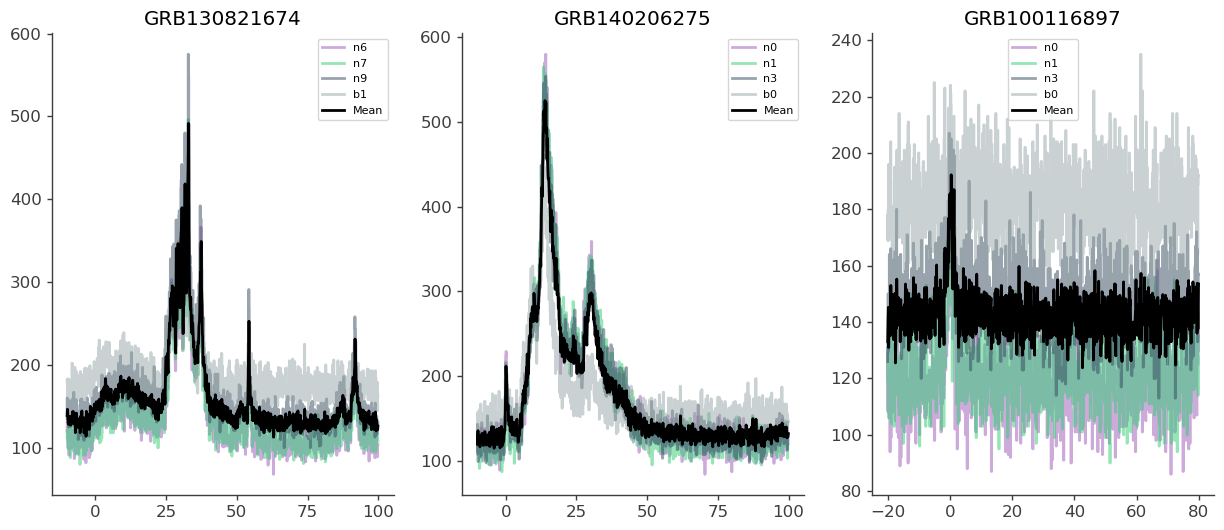

In [14]:
# GBM first
fig, ax = plt.subplots(1,5, figsize = (25, 6))

times = [
    (-10, 100),
    (-10, 100),
    (-20, 80)
]
for i,name in enumerate(names):

    data = generate_gbm_lightcurve(name = name, time_in = times[i][0], time_out = times[i][1])

    ax[i].set_title(name)

    mean = plot_dets(ax[i], data)
    ax[i].legend()

    mean.to_csv('./Data/GBM_%s'%name)

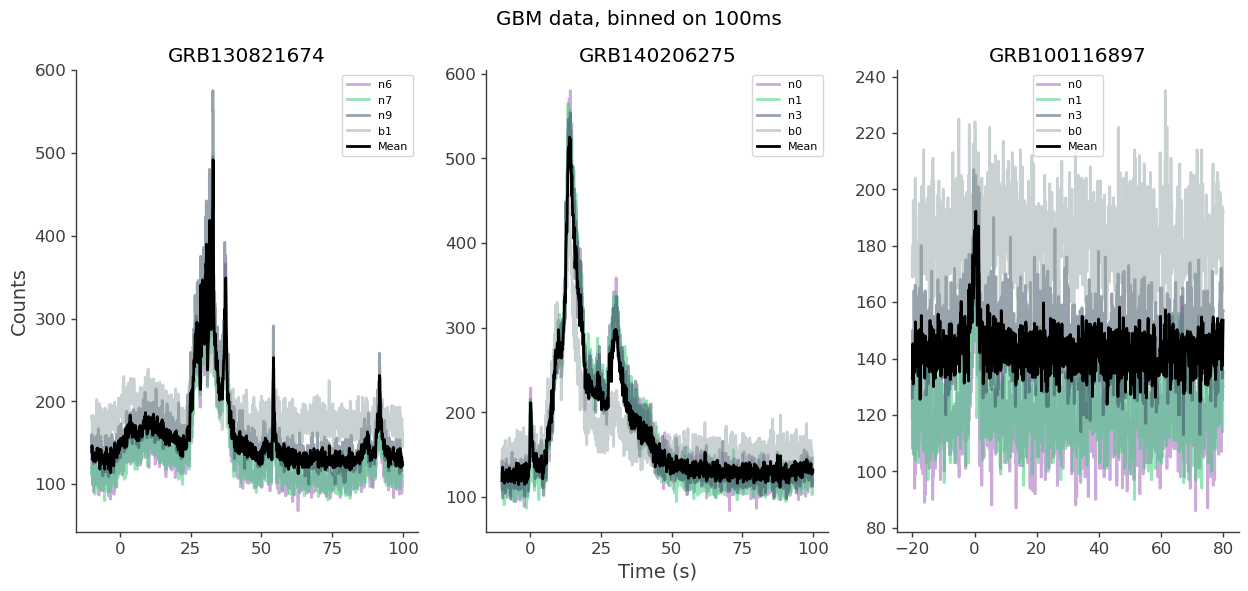

In [7]:
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Counts')
fig.suptitle('GBM data, binned on 100ms')
#fig.savefig('Top_3_GBM.png')
fig

18:48:30 INFO      file gll_cspec_bn130821674_v01.pha is already downloaded!              ]8;id=276690;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=111957;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

18:48:31 INFO      file gll_cspec_bn130821674_v01.rsp is already downloaded!              ]8;id=674234;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=229602;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file gll_lle_bn130821674_v01.fit is already downloaded!                ]8;id=82266;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=969625;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

18:48:32 INFO      file gll_pt_bn130821674_v01.fit is already downloaded!                 ]8;id=680339;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=818257;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=387637;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=193727;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'                                          

         INFO      Created 110 bins via constant                                         ]8;id=520481;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=377068;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

18:48:33 INFO      file gll_cspec_bn140206275_v02.pha is already downloaded!              ]8;id=48368;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=140552;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

18:48:34 INFO      file gll_cspec_bn140206275_v02.rsp is already downloaded!              ]8;id=304870;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=82886;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file gll_lle_bn140206275_v02.fit is already downloaded!                ]8;id=611086;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=57794;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

18:48:35 INFO      file gll_pt_bn140206275_v02.fit is already downloaded!                 ]8;id=667966;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=186437;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=483974;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=759787;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'                                          

         INFO      Created 110 bins via constant                                         ]8;id=524819;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=152950;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

18:48:36 INFO      file gll_cspec_bn100116897_v01.pha is already downloaded!              ]8;id=202879;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=572305;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

18:48:37 INFO      file gll_cspec_bn100116897_v01.rsp is already downloaded!              ]8;id=154251;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=387857;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         INFO      file gll_lle_bn100116897_v01.fit is already downloaded!                ]8;id=101982;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=663363;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

18:48:38 INFO      file gll_pt_bn100116897_v01.fit is already downloaded!                 ]8;id=565089;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py\download_from_http.py]8;;\:]8;id=588240;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/io/download_from_http.py#195\195]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=177102;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=997134;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'                                          

         INFO      Created 100 bins via constant                                         ]8;id=735187;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=6967;file:///Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

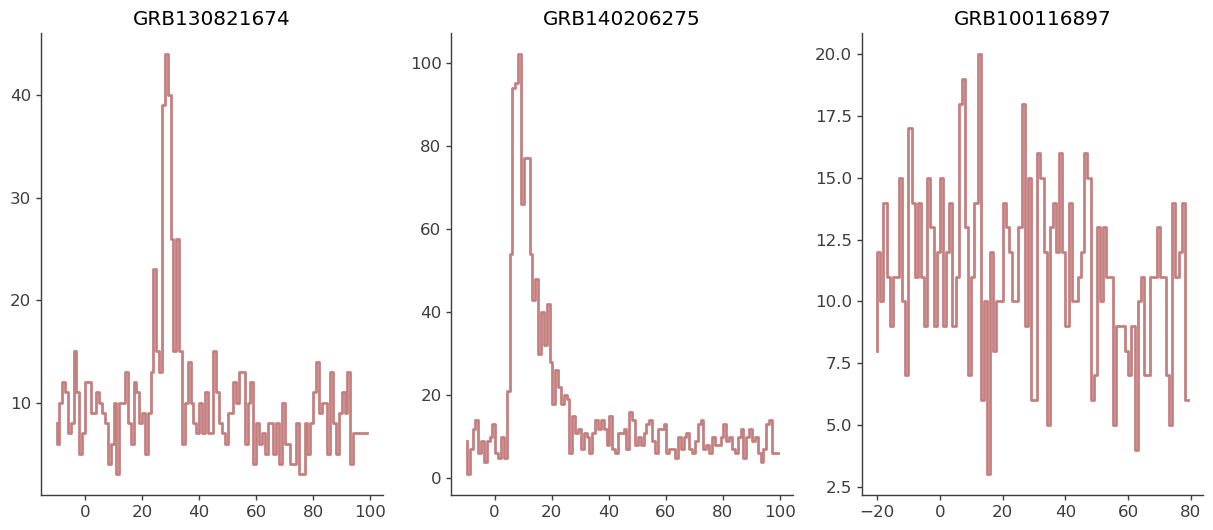

In [11]:
# LAT next
fig, ax = plt.subplots(1,5, figsize = 25, 6)

times = [
    (-10, 100),
    (-10, 100),
    (-20, 80)
]

for i,name in enumerate(names):

    data = generate_lle_lightcurve(name = name, time_in = times[i][0], time_out = times[i][1], dt=1)

    ax[i].set_title(name)

    ax[i].step(data['Start'], data['Counts'], alpha=.5, color = 'darkred')

    data.to_csv('./Data/LAT_%s'%name)
    #ax[i].legend()

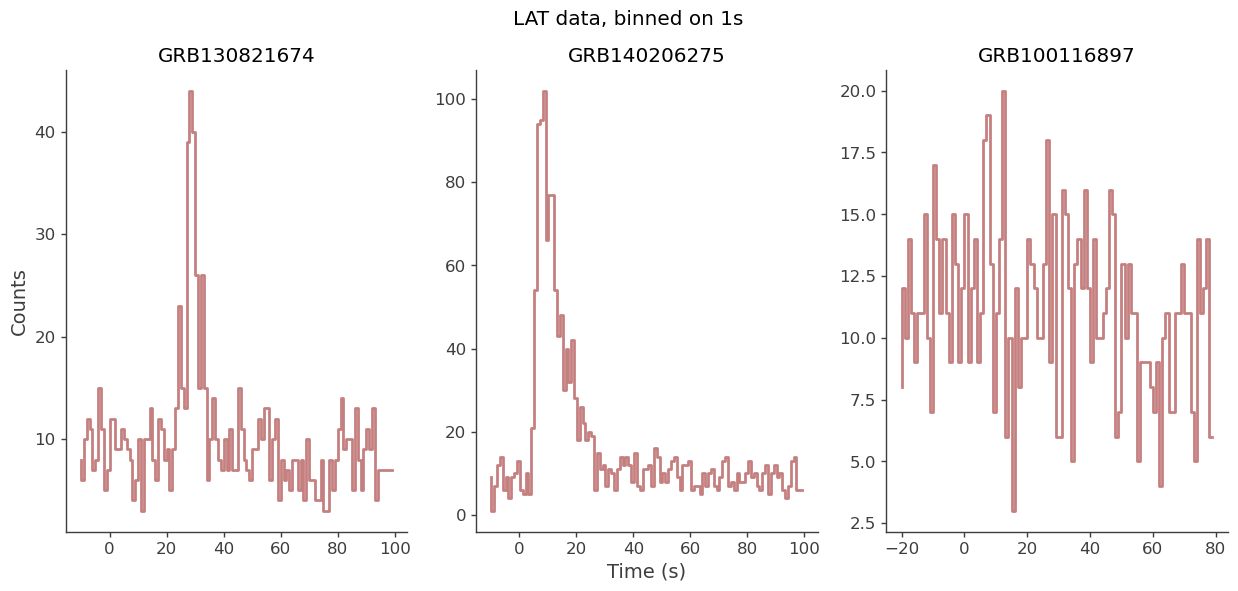

In [9]:
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Counts')
fig.suptitle('LAT data, binned on 1s')
#fig.savefig('Top_3_LAT.png')
fig